In [1]:
import pandas as pd
df = pd.read_csv('activities.csv')
df['start_day'] = pd.to_datetime(df['start_time']).dt.date
df.head()

,lap_number,start_time,total_timer_time,total_elapsed_time,total_distance,total_ascent,total_descent,max_heart_rate,avg_heart_rate,max_speed_mm_sec,total_strides,start_day
0,1,2016-05-28 10:14:20,358.475,358.475,1282.63,24.0,1.0,NaN,NaN,4039.0,NaN,2016-05-28
1,2,2016-05-28 10:21:29,403.020,693.325,1824.32,12.0,8.0,NaN,NaN,5346.0,NaN,2016-05-28
2,3,2016-05-28 10:32:02,2102.075,2197.650,6894.45,25.0,19.0,NaN,NaN,4472.0,NaN,2016-05-28
3,1,2014-06-21 18:06:03,52.100,52.100,85.17,0.0,1.0,NaN,NaN,3263.0,NaN,2014-06-21
4,2,2014-06-21 18:06:55,23.451,23.451,9.06,0.0,0.0,NaN,NaN,1923.0,NaN,2014-06-21


In [37]:
import datetime

distance_filter = (df['total_distance'] < 2100) & (df['total_distance'] > 1900)
tempo_filter = df['total_timer_time'] < 550
date_filter = (df['start_day'] < datetime.date(2020,11,1)) & (df['start_day'] > datetime.date(2019,1,1))
sorted_by_date = df.sort_values('start_time', ascending=True)
intervals = sorted_by_date[date_filter]

/Users/jimmyrasmussen/git/python-scratchpad/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [31]:
df[df['start_day'] == datetime.date(2020,4,3)]

,lap_number,start_time,total_timer_time,total_elapsed_time,total_distance,total_ascent,total_descent,max_heart_rate,avg_heart_rate,max_speed_mm_sec,total_strides,start_day
2157,1,2020-04-03 14:31:33,330.847,459.810,1114.74,28.0,39.0,197.0,175.0,3816.0,485.0,2020-04-03
2158,2,2020-04-03 14:39:13,484.563,702.755,1998.32,57.0,62.0,200.0,184.0,4329.0,754.0,2020-04-03
2159,3,2020-04-03 14:50:55,500.929,758.762,2003.08,100.0,69.0,195.0,183.0,4189.0,774.0,2020-04-03
2160,4,2020-04-03 15:03:35,502.531,847.159,2003.50,92.0,74.0,175.0,167.0,4124.0,779.0,2020-04-03
2161,5,2020-04-03 15:17:42,482.234,488.119,2005.81,92.0,76.0,186.0,171.0,4376.0,753.0,2020-04-03
2162,6,2020-04-03 15:25:50,401.617,656.995,1265.06,42.0,26.0,192.0,175.0,3490.0,589.0,2020-04-03


In [45]:
mean_lap_times = sorted_by_date[(date_filter) & (distance_filter) & (tempo_filter)].groupby(by='start_day', as_index=False).mean()
mean_lap_times = mean_lap_times[mean_lap_times['lap_number'] == 3.5][['start_day','total_timer_time']]

/Users/jimmyrasmussen/git/python-scratchpad/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


No handles with labels found to put in legend.


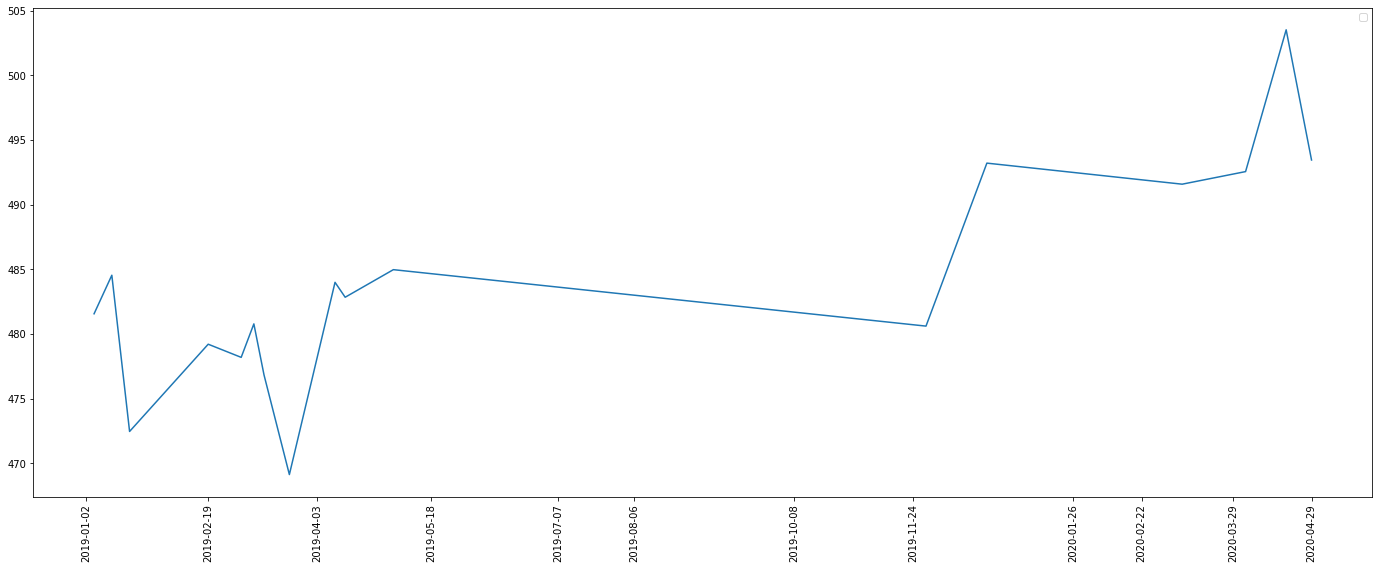

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m-%d")
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(formatter)
plt.rcParams["figure.figsize"] = (24,9)
plt.plot(mean_lap_times['start_day'], mean_lap_times['total_timer_time'])
plt.xticks(intervals['start_day'][::50], rotation=90)
plt.legend()
plt.show()